In [10]:
# Example 4.16 AutoencoderKeras.py
# Modified from:
# https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/
#
# Load the MNIST handwritten digital images =============================
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
# Build Autoencoder =====================================================
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
def build_autoencoder(img_shape, code_size):
# The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))
    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape)))
    decoder.add(Reshape(img_shape))
    return encoder, decoder

In [12]:
IMG_SHAPE = x_train[0].shape
encoder, decoder = build_autoencoder(IMG_SHAPE, 32)

In [13]:
inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)
autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_2 (Sequential)   (None, 32)                25120     
                                                                 
 sequential_3 (Sequential)   (None, 28, 28)            25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Train Autoencoder =====================================================
history = autoencoder.fit(x=x_train, y=x_train, epochs=20,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 2s 899us/step - loss: 0.0297 - val_loss: 0.0182
Epoch 2/20
1875/1875 [==============================] - 2s 864us/step - loss: 0.0178 - val_loss: 0.0171
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0175 - val_loss: 0.0170
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0174 - val_loss: 0.0170
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0174 - val_loss: 0.0169
Epoch 6/20
1875/1875 [==============================] - 2s 945us/step - loss: 0.0174 - val_loss: 0.0169
Epoch 7/20
1875/1875 [==============================] - 2s 845us/step - loss: 0.0174 - val_loss: 0.0169
Epoch 8/20
1875/1875 [==============================] - 2s 844us/step - loss: 0.0174 - val_loss: 0.0169
Epoch 9/20
1875/1875 [==============================] - 2s 848us/step - loss: 0.0174 - val_loss: 0.0169
Epoch 10/20
1875/1875 [==============================] - 2s 853us/step

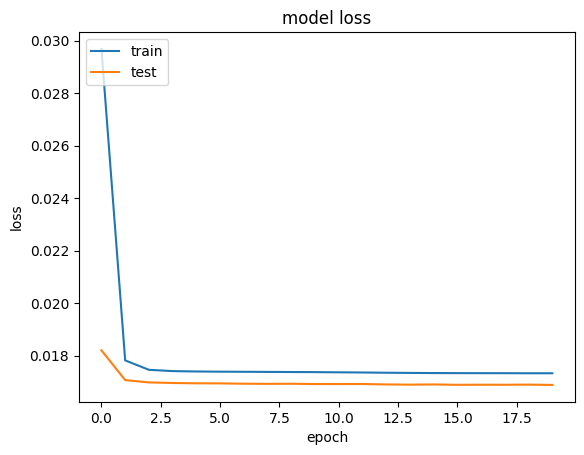

In [15]:
# Plot the training results =============================================
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 33ms/step


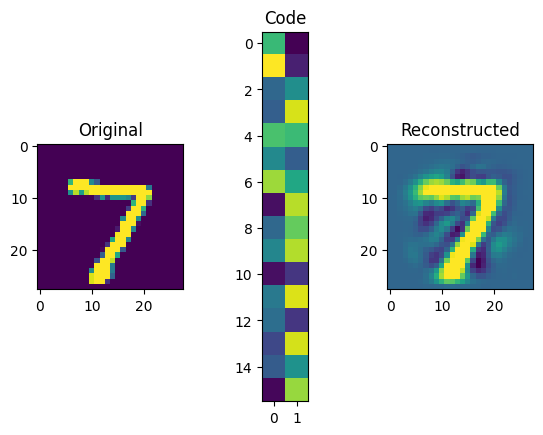

1/1 [==============================] - 0s 13ms/step


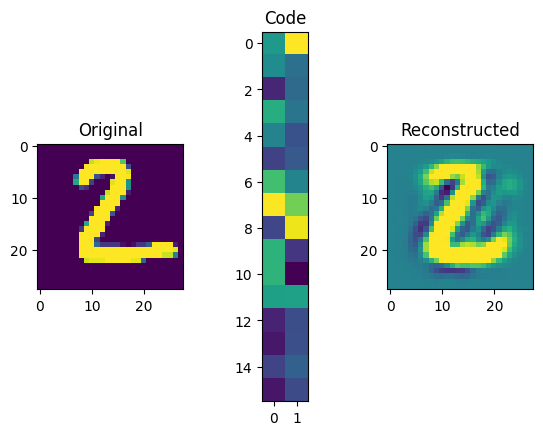

1/1 [==============================] - 0s 13ms/step


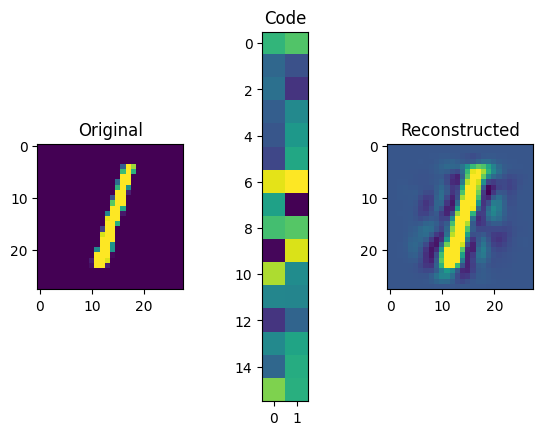

1/1 [==============================] - 0s 13ms/step


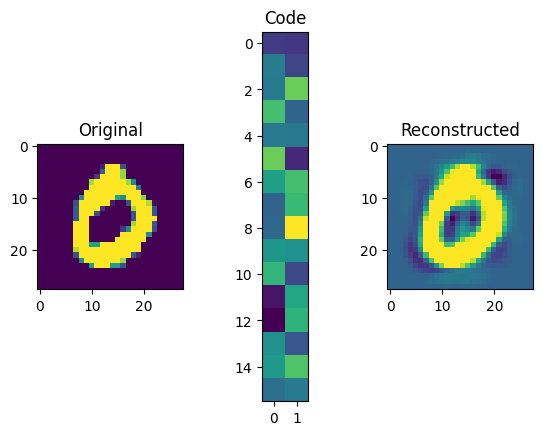

1/1 [==============================] - 0s 12ms/step


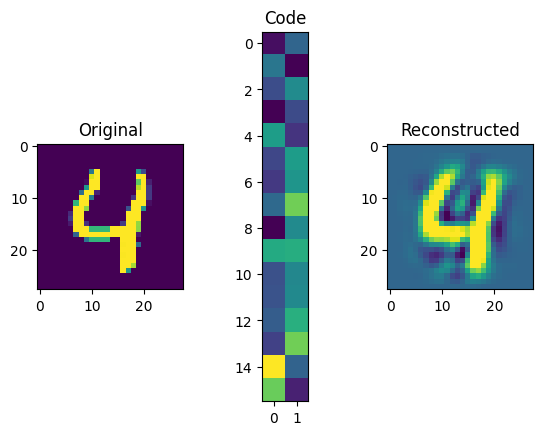

In [16]:
# Plot the original, encoded and decoded images =========================
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))
    
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()
    
for i in range(5):
    img = x_test[i]
    visualize(img,encoder,decoder)

NameError: name 'loss' is not defined

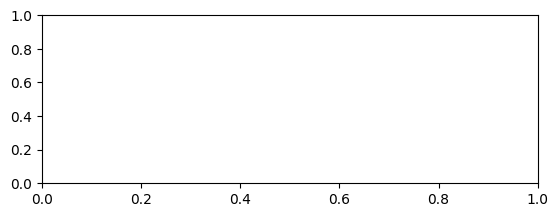

In [17]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f"""Training and Validation Loss. \nTrain Loss: 
          {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}""")
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()